In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [18]:
#boston 데이터 세트 로드
boston = load_boston()

#boston 데이터 세트 DataFRame 변환
bostonDF = pd.DataFrame(boston.data, columns =boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임, 이를 Price 컬럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()


Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


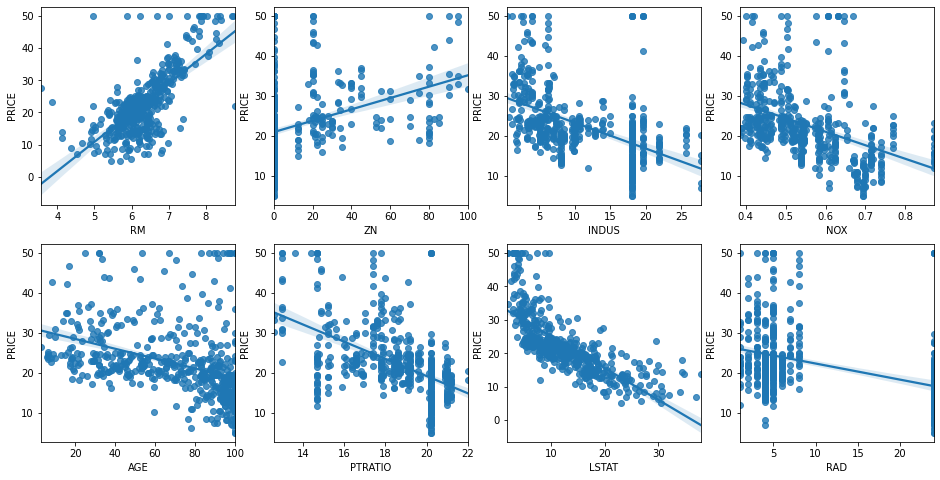

In [19]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현 
    sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형 회귀 OLS로 학습/예측 평가
lr = LinearRegression() 
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f},RMSE:{1:3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 17.297,RMSE:4.158956
Variance score: 0.757


In [21]:
print('절편 값: ',lr.intercept_)
print('회귀 계수 값: ',np.round(lr.coef_,1))

절편 값:  40.99559517216444
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [22]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [23]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [24]:
from sklearn.model_selection import cross_val_score 
y_target = bostonDF['PRICE']
lr = LinearRegression()



In [25]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
X_data=bostonDF.drop(['PRICE'],axis=1)

In [27]:
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
#cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기바능로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores: ',np.round(rmse_scores,2))
print('5 folds 의 평균 MSE scores: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 MSE scores: 5.829


In [29]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성,[[0,1],[2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처" \n',X)

#degree =2인 2차 다항식으로 변환하기 위해 PolymonialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처: \n',poly_ftr)


일차 단항식 계수 피처" 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [30]:
def polynomial_func(x):
    y = 1+2*X[:,0]+3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y=polynomial_func(X)
print('삼차 단항식 결정값: \n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 단항식 결정값: 
 [  5 125]


In [31]:
#3차 단항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 shape:',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polynomial_func(x):
    y = 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

#Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 릿지 회귀
- L2 규제

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse  = np.mean(rmse_scores)

In [36]:
print('5 folds 의 개별 Negative MSE scores:',np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores:',np.round(neg_mse_scores,3))
print('5 folds 의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 평균 RMSE:5.518


In [38]:
#릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0,0.1,1,10,100]

#alphas list값을 반복하면서 alpha에 따른 평균 RMSE를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha{0}일 때 5folds의 평균 RMSE:{1:3f}'.format(alpha, avg_rmse))

alpha0일 때 5folds의 평균 RMSE:5.828659
alpha0.1일 때 5folds의 평균 RMSE:5.788487
alpha1일 때 5folds의 평균 RMSE:5.652571
alpha10일 때 5folds의 평균 RMSE:5.518166
alpha100일 때 5folds의 평균 RMSE:5.329590


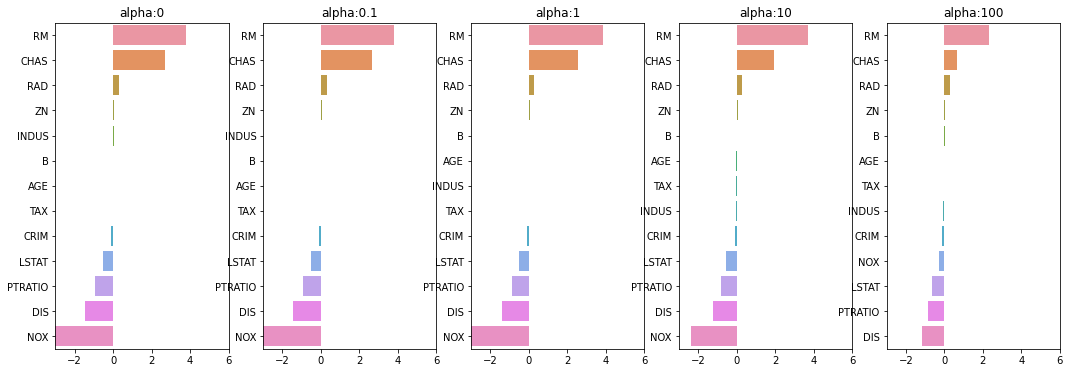

In [40]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 멧플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data,y_target)
    #alpha에 따른 피처별로 회귀 계수를 Seies로 변환하고 이를 DataFrame의 칼럼으로 생성
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
#for문 바깥에서 멧플롯립의 show호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [41]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### L2규제(릿지)와 L1규제(라쏘)의 차이점
- L2규제는 회귀 계수의 크기를 조정함
- L1규제는 불필요한 회귀 계수를 0으로 만들어 제거함

In [45]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수 값들을 DataFrame으로 반환

def get_linear_reg_eval(model_name, params = None, X_data_n=None, y_target_n=None, verbose = True, return_coeff =True):
    coeff_df = pd.DataFrame()
    if verbose: print('#####', model_name,'#####')
    
    for param in params:
        if model_name =='Ridge':model =Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet':model = ElasticNet(alpha=param, l1_ratio = 0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5폴드 세트 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
        #cross_val_score는 evaluation metric만 반환 하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럽으로 추가
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname='alpha: '+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df
#end of get_linear_regre_eval



In [46]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval()함수 호출
lasso_alphas = [0.05, 0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas, X_data_n= X_data, y_target_n = y_target)


##### Lasso #####
alpha 0.05일 때 5폴드 세트 평균 RMSE:5.628
alpha 0.1일 때 5폴드 세트 평균 RMSE:5.615
alpha 0.5일 때 5폴드 세트 평균 RMSE:5.669
alpha 1일 때 5폴드 세트 평균 RMSE:5.776
alpha 3일 때 5폴드 세트 평균 RMSE:6.189


In [51]:
#반환된 coeff_lasso_df를 첫 번째 칼럼 순으로 내림 차순 정렬해 회귀계수 DataFrame 출력
sort_column ='alpha: '+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.05,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.836618,3.703202,2.498212,0.949811,0.000000
CHAS,1.761631,0.955190,0.000000,0.000000,0.000000
RAD,0.271034,0.274707,0.277451,0.264206,0.061864
ZN,0.048826,0.049211,0.049544,0.049165,0.037231
B,0.010193,0.010249,0.009469,0.008247,0.006510
AGE,-0.011858,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014028,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.041355,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098935,-0.097894,-0.083289,-0.063437,-0.000000
LSTAT,-0.553925,-0.568769,-0.656290,-0.761115,-0.807679


In [60]:
#엘라스틱넷에 사용될 alpha 파라미터 값들을 정의하고 get_linear_reg_eval()함수 호출
#l1_ratio는 0,7로 고정
elastic_alphas = [0.07, 0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

##### ElasticNet #####
alpha 0.07일 때 5폴드 세트 평균 RMSE:5.542
alpha 0.1일 때 5폴드 세트 평균 RMSE:5.526
alpha 0.5일 때 5폴드 세트 평균 RMSE:5.467
alpha 1일 때 5폴드 세트 평균 RMSE:5.597
alpha 3일 때 5폴드 세트 평균 RMSE:6.068


In [62]:
#반환된 coeff_elastic_df를 첫 번째 칼럼 순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: '+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [64]:
#method는 표준 정규 분포 변환(Standard),최댓값/최솟값 정규화(MinMax), 로그 변환(Log)결정
#p_degree는 다항식 특성을 추가할 때 적용 p_degree는 2이상 부여하지 않음

def get_scaled_data(method=None, p_degree=None, input_data=None):
    if method =='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data =np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [74]:
#Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE추출
alphas = [0.1,1,10,100]

#5개 방식으로 변환, 번저 원본 그대로 표준정규 분포, 표준정규 분포+다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그 변환

scale_methods=[(None,None),('Standard',None),('Standard', 2),('MinMax',None),('MinMax', 2),('Log',None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method= scale_method[0],p_degree =scale_method[1],input_data=X_data)
    
    print('\n ##변환 유형:{0},Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


 ##변환 유형:None,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트 평균 RMSE:5.788
alpha 1일 때 5폴드 세트 평균 RMSE:5.653
alpha 10일 때 5폴드 세트 평균 RMSE:5.518
alpha 100일 때 5폴드 세트 평균 RMSE:5.330

 ##변환 유형:Standard,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트 평균 RMSE:5.826
alpha 1일 때 5폴드 세트 평균 RMSE:5.803
alpha 10일 때 5폴드 세트 평균 RMSE:5.637
alpha 100일 때 5폴드 세트 평균 RMSE:5.421

 ##변환 유형:Standard,Polynomial Degree:2
alpha 0.1일 때 5폴드 세트 평균 RMSE:8.827
alpha 1일 때 5폴드 세트 평균 RMSE:6.871
alpha 10일 때 5폴드 세트 평균 RMSE:5.485
alpha 100일 때 5폴드 세트 평균 RMSE:4.634

 ##변환 유형:MinMax,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트 평균 RMSE:5.764
alpha 1일 때 5폴드 세트 평균 RMSE:5.465
alpha 10일 때 5폴드 세트 평균 RMSE:5.754
alpha 100일 때 5폴드 세트 평균 RMSE:7.635

 ##변환 유형:MinMax,Polynomial Degree:2
alpha 0.1일 때 5폴드 세트 평균 RMSE:5.298
alpha 1일 때 5폴드 세트 평균 RMSE:4.323
alpha 10일 때 5폴드 세트 평균 RMSE:5.185
alpha 100일 때 5폴드 세트 평균 RMSE:6.538

 ##변환 유형:Log,Polynomial Degree:None
alpha 0.1일 때 5폴드 세트 평균 RMSE:4.770
alpha 1일 때 5폴드 세트 평균 RMSE:4.676
alpha 10일 때 5폴드 세트 평균 RMSE:4.836
alp

### 로지스틱 회귀

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [84]:
#StandardScaler(로 평균이 0 분산이1인 정규 분포 형태로 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [85]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy :{0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc_score: {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy :0.977
roc_auc_score: 0.972


In [89]:
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l2','l1'], 'C':[0.01,0.1,1,1,5,10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params ,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_v

### 회귀 트리
- 비선형 회귀 계수의 결합을 기반으로 비선형 회귀 함수를 통해 결과값을 예측하는 것이 비선형 회귀 함수
- 회귀 함수를 기반으로 하는 것이 아닌 결정 트리와 같이 트리 기반으로 회귀를 수행하는 것이 회귀 트리
- XGBoost, LightGBM과 같은 알고리즘 사용 가능


In [90]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [91]:
#보스턴 데이터 세트 로드
boston = load_boston() 
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [95]:
bostonDF['PRICE']= boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1)

rf = RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data, y_target, scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증 개별 Negative MSE Scores:',np.round(neg_mse_scores,2))
print('5 교차 검증 개별 RMSE Scores:',np.round(rmse_scores,2))
print('5 교차 검증 평균 RMSE Scores: {0:,.3f}'.format(avg_rmse))

5 교차 검증 개별 Negative MSE Scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증 개별 RMSE Scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증 평균 RMSE Scores: 4.423


In [109]:
def get_model_cv_predict(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####',model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))
    

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [111]:
y_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [112]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models=[dt_reg,rf_reg, gb_reg, xgb_reg, lgbm_reg]

for model in models:
    get_model_cv_predict(model,X_data,y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE: 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE: 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE: 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE: 4.251
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE: 4.646


<AxesSubplot:>

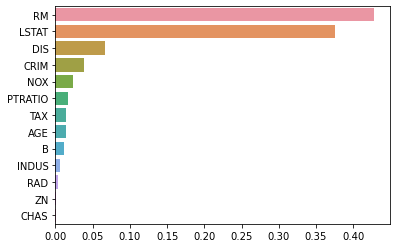

In [115]:
import seaborn as sns
%matplotlib inline

rf_reg =RandomForestRegressor(n_estimators=1000)
#앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습함
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


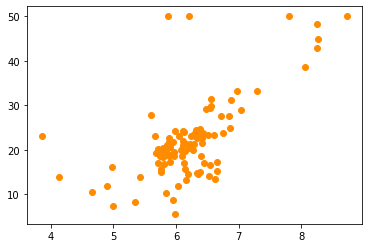

In [118]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM,bostonDF_sample.PRICE,c='darkorange')

In [131]:
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성, DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5RKwldml 100개의 데이터 세트로 생성
X_test =np.arange(4.5,8.5,0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)


#학습 과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

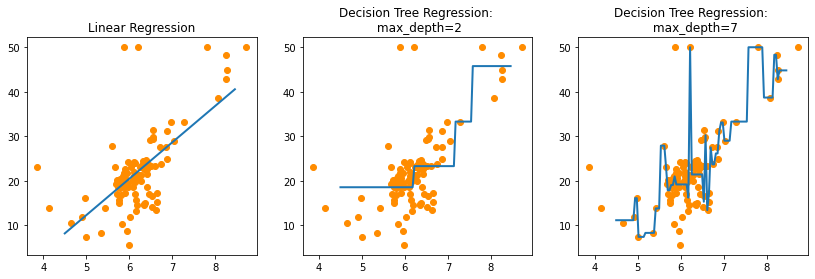

In [132]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(14,4),ncols=3)

#X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

#DecisionTreeRegressot의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test,pred_rf2, label='max_depth:2',linewidth=2)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test,pred_rf7,label='max_depth:7',linewidth=2)

### 회귀 실습

In [133]:
bike_df = pd.read_csv('data/bike/train.csv')

In [136]:
#문자열을 datetime 타입으로 변경
bike_df['datetime']=bike_df.datetime.apply(pd.to_datetime)

#datetime 타입에서 년,월,일 시간 추출
bike_df['year']=bike_df.datetime.apply(lambda x:x.year)
bike_df['month']=bike_df.datetime.apply(lambda x:x.month)
bike_df['day']=bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']=bike_df.datetime.apply(lambda x:x.hour)

In [141]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

#log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p를 이용해 RMSE계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷런의 mean_square_error()를 이용해 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

#MSE, RMSE, RMSLE를 모두 계산
def evaluate_reg(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    #MAE는 사이킷런의 mean_absolute_error()로 계산
    mae_val=mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MAE: {2:.3f}'.format(rmsle_val,rmse_val,mae_val))

In [163]:
y_target =bike_df['count']
X_features = bike_df.drop(['count'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

evaluate_reg(y_test,pred)

RMSLE: 1.165, RMSE:140.900, MAE: 105.924


<ipython-input-162-3b8a1f80cb28>:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [167]:
def get_top_error_data(y_test, pred, n_tops=5):
    #DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count']-result_df['predicted_count'])
    
    #예측값과 실제 ㄱ밧이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff',ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

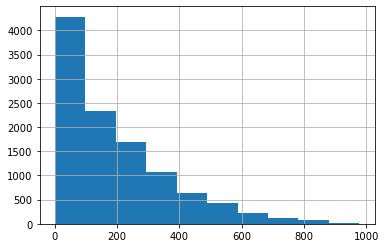

In [168]:
y_target.hist()

<AxesSubplot:>

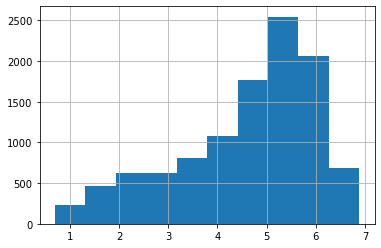

In [169]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [172]:
#타겟 컬럼인 count 값을 log1p로 로그 변환

y_target_log = np.log1p(y_target)

#로그 변환된 y_target_log를 반영해 학습/ 테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3,random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터 세트의 target값은 로그 변환 됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

#예측값 역시 로그 변환된 타깃 기반으로 학습돼 예측됐으므로 다시 expm1로 스케일 변환
pred_exp = np.expm1(pred)

evaluate_reg(y_test_exp, pred_exp)

RMSLE: 1.017, RMSE:162.594, MAE: 109.286


<AxesSubplot:>

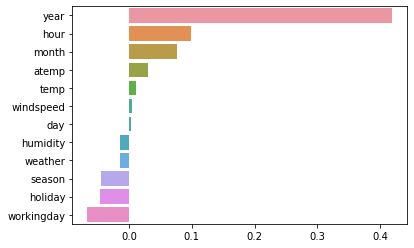

In [174]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

- 연도에 따라 자전거 대여 횟수가 영향을 받는 다는 것은 이해하기 힘듬
- 숫자형 카테고리 값을 선형 회귀에 사용할 경우 회귀 계수를 계산할 때 이 값에 영향을 받을 수 있음
- 따라서 선형 회귀에서는 이러한 속성을 원-핫 인코딩해주어야함

In [177]:
#'year','month','day','hour'등의 피처를 One-Hot Encoding
X_features_ohe= pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [178]:
#원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/테스트 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

#모델과 학습/테스트 데이터 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
    print('##',model.__class__.__name__,'##')
    evaluate_reg(y_test,pred)
#end of function get_model_predict

#모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=0)
lasso_reg = Lasso(alpha=0)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=True)

## LinearRegression ##
RMSLE: 0.590, RMSE:97.690, MAE: 63.383
## Ridge ##
RMSLE: 0.591, RMSE:98.032, MAE: 63.571


<ipython-input-178-60d509b13e95>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train,y_train)
C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


## Lasso ##
RMSLE: 0.590, RMSE:97.688, MAE: 63.382


C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269.4352353771424, tolerance: 1.5327706996739923
  model = cd_fast.enet_coordinate_descent(


<AxesSubplot:>

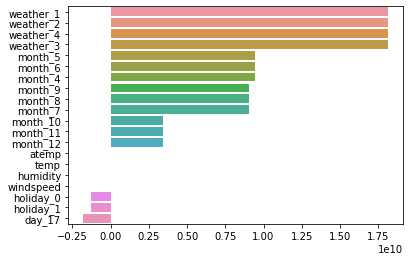

In [181]:
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort_values = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort_values,y=coef_sort_values.index)

In [184]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#랜덤 포레스트, GBM, XGBoost, LightGBM별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, xgb_reg, lgbm_reg]:
    #XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능 ndarray로 변환
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

## RandomForestRegressor ##
RMSLE: 0.354, RMSE:50.138, MAE: 31.111
## XGBRegressor ##
RMSLE: 0.342, RMSE:51.732, MAE: 31.251
## LGBMRegressor ##
RMSLE: 0.319, RMSE:47.215, MAE: 29.029


### 집값 예측

In [260]:
house_train_df = pd.read_csv('data/house_price/train.csv')
house_train_df_org = pd.read_csv('data/house_price/train.csv')
house_test_df = pd.read_csv('data/house_price/test.csv')

In [261]:
house_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [262]:
house_test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\pw017\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Original Sale Price Histogram'}, xlabel='SalePrice', ylabel='Density'>

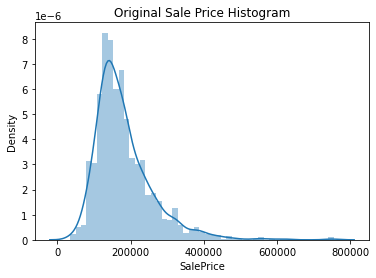

In [263]:
plt.title('Original Sale Price Histogram')
sns.distplot(house_train_df['SalePrice'])

C:\Users\pw017\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Transformed SalePrice Histogram'}, xlabel='SalePrice', ylabel='Density'>

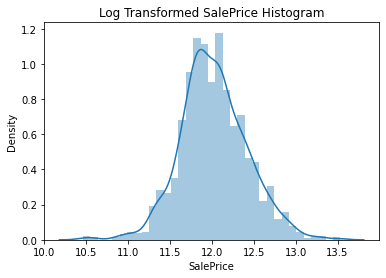

In [264]:
plt.title('Log Transformed SalePrice Histogram')
log_SalePrice= np.log1p(house_train_df['SalePrice'])
sns.distplot(log_SalePrice)

In [265]:
# #SalePrice로그 변환
# original_SalePrice = house_train_df['SalePrice']
# house_train_df['SalePrice']=np.log1p(house_train_df['SalePrice'])

# #Null이 너무 많은 칼럼과 불필요한 칼럼 삭제
# house_train_df=house_train_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

# #삭제하지 않는 숫자형 Null칼럼은 평균값으로 대체
# house_train_df=house_train_df.fillna(house_train_df.mean())

#Null값이 있는 피처명과 타입을 추출
null_column_count = house_train_df.isnull().sum()[house_df.isnull().sum()>0]
print('##Null 피처의 Type: \n',house_train_df.dtypes[null_column_count.index])

##Null 피처의 Type: 
 LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [266]:
print('get_dummies() 수행전 데이터 shape:',house_train_df.shape)
house_train_df_ohe = pd.get_dummies(house_train_df)
print('get_dummies() 수행 후 데이터 shape:',house_train_df_ohe.shape)

null_column_count = house_train_df_ohe.isnull().sum()[house_train_df_ohe.isnull().sum()>0]
print('## Null 피처의 Type:\n',house_train_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행전 데이터 shape: (1460, 81)
get_dummies() 수행 후 데이터 shape: (1460, 290)
## Null 피처의 Type:
 LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object


In [267]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__,'로그 변환된 RMSE:',np.round(rmse,3))
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
        
    return rmses

In [268]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_train_df_ohe['SalePrice']
X_features = house_train_df_ohe.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state = 156)

#LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models= [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
def get_top_bottom_coef(model, n=10):
    #coef_속성을 기반으로 Seies 객체를 생성, index는 칼럼명
    coef = pd.Series(model.coef_,index=X_features.columns)
    
    #+상위 10개, -하위 10개의 회귀 계수를 추출해 반환
    coef_high = coef.sort_values(ascending=False)[:n]
    coef_low = coef.sort_values(ascending=True)[:n]
    
    return coef_high, coef_low

In [ ]:
def visualize_coefficient(models):
    #3개 회귀 모델의 시각화를 위해 3개의 칼럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    #입력 인자로 받은 list객체인 models에서 차례로 model을 추출해 회귀계수 시각화
    for i_num, model in enumerate(models):
        #상위 10개, 하위 10개 회귀 계수를 구하고 이를 판다스 concat으로 변환
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high,coef_low])
        
        #ax subplot에 barchart로 표현, 한 화면에 표현하기 위해 tick label위치와 font 크기 조정
        axs[i_num].set_title(model.__class__.__name__+'Coeffecents',size=25)
        axs[i_num].tick_params(axis='y',direction='in',pad=-120)
        for label in (axs[i_num].get_xticklabels()+axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
#앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화
models = [lr_reg,ridge_reg,lasso_reg]
visualize_coefficient(models)

In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        #분할하지 않고 전체 데이터로 cross_val_score()를 수행, 모델별 CV RMSE값과 평균 RMSE출력
        rmse_list = np.sqrt(-cross_val_score(model,X_features,y_target,scoring='neg_mean_squared_error',cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format(model.__class__.__name__,np.round(rmse_list,3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
        
#앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력
models = [lr_reg,ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

In [ ]:
def print_best_params(model, params):
    grid_model = GridSearchCV(model,param_grid= params, scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 Alpha:{2}'.format(model.__class__.__name__,np.round(rmse,4),grid_model.best_params_))
    
ridge_params = {'alpha':[0.05,0.1,1,5,8,19,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)
    

In [ ]:
#앞의 최적화 alpha 값으로 학습 데이터로 학습, 테스트 데이터로 예측 및 평가 수행
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

#모든 모델의 RMSE출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

#모든 모델의 회귀 계수 시각화 
visualize_coefficient(models)


In [ ]:
from scipy.stats import skew

#object가 아닌 숫자형 피처의 칼럼 index 객체 추출
features_index = house_train_df.dtypes[house_train_df.dtypes !='object'].index
#house_train_df에 칼럼 index를 []로 입력하면 해당하는 칼럼 데이터 세트 반환 .apply lambda로 skew()호출
skew_features = house_train_df[features_index].apply(lambda x: skew(x))
#skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features>1]
print(skew_features_top.sort_values(ascending=False))

In [ ]:
house_train_df[skew_features_top.index]=np.log1p(house_train_df[skew_features_top.index])

In [258]:
#왜곡 정보다 높은 피처를 로그 변환 했으므로 다시 원핫 인코딩을 적용하고 피처/ 타겟 데이터 세트 생성
house_tain_df_ohe = pd.get_dummies(house_train_df)
y_target = house_train_df_ohe['SalePrice']
X_features = house_train_df_ohe.drop('SalePrice',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

#피처를 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha':[0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:

C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:

C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 542, in fit
    X, y = self._validate_data(X, y,
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\pw017\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

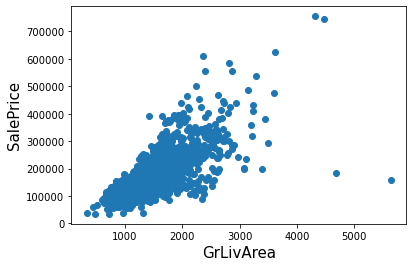

In [259]:
plt.scatter(x = house_train_df_org['GrLivArea'],y=house_train_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea',fontsize=15)
plt.show()